#**PROJECT :PCOS DETECTION USING ULTRASOUND IMAGES**

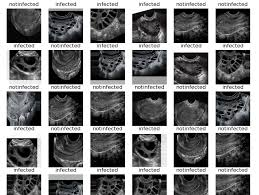

**ABOUT DATASET**

Data folder consist of 'train' and 'test' subfolders containing 2 categories of data 'infected' and 'notinfected'

infected : Images of ovaries having PCOS

notinfected : Images of healthy ovaries

**IMPORT NECESSARY LIBRARIES**

In [ ]:
import pandas as pd
from skimage.io import imread
from skimage.transform import resize
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.preprocessing import LabelEncoder #to change the datatype into integer

import tensorflow as tf


**LIST FILES IN THE TRAINING DIRECTORY**

In [ ]:
os.listdir('/content/drive/MyDrive/PCOS/PCOD/train')

['notinfected', 'infected']

In [ ]:
datadir='/content/drive/MyDrive/PCOS/PCOD/train'

**LOAD THE IMAGE FOR TRAINING**

In [ ]:
X_train=[] #to store the images in training
y_train=[] #to store the class labels in training
Categories=['notinfected', 'infected'] #categories in training data
#to get the path of 4 folders we use loop
datadir='/content/drive/MyDrive/PCOS/PCOD/train'
for i in Categories:
  print("Loading............",i) #to know the what are the categories are loaded
  path=os.path.join(datadir,i) #to get the path of each
  #print(path)
  images=os.listdir(path) #to get the list the images
  #print(images)
  #to get path of each image
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    #after get the path , to read each image using array format
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1)) #for resize the image.here 1 represent gray scale image
    X_train.append(img_resized) #append the images to training set
    y_train.append(Categories.index(i)) #to append class labels
  print("Completed.......",i) #to know, which categories are loaded

Loading............ notinfected
Completed....... notinfected
Loading............ infected
Completed....... infected


In [ ]:
img_arr.shape

(259, 280, 3)

In [ ]:
print(img_arr)

[[[ 3  3  3]
  [13 13 13]
  [ 2  2  2]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 7  7  7]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 8  8  8]
  [12 12 12]
  [ 9  9  9]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 ...

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]


In [ ]:
img_resized.shape

(150, 150, 1)

In [ ]:
img_resized

array([[[2.30460702e-02],
        [6.82378588e-03],
        [3.59615437e-02],
        ...,
        [1.47129074e-03],
        [1.47129074e-03],
        [1.47129074e-03]],

       [[4.27299598e-02],
        [4.68121458e-02],
        [1.33206478e-01],
        ...,
        [1.15568830e-04],
        [1.15568830e-04],
        [1.15568830e-04]],

       [[7.92285801e-02],
        [8.43635903e-02],
        [1.60657274e-01],
        ...,
        [1.56745799e-02],
        [1.56745799e-02],
        [1.56745799e-02]],

       ...,

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00]],

       [[0.00000000e+00],
        [0.00000000e+00],
        [0.00000000e+00],
        ...,
        [0.00000000e+00],
        [0.0000

**LOAD THE IMAGE FOR TESTING**

In [ ]:
X_test=[]
y_test=[]
Categories=['notinfected', 'infected']
datadir='/content/drive/MyDrive/PCOS/PCOD/test'
for i in Categories:
  print("Loading............",i)
  path=os.path.join(datadir,i)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    img_resized=resize(img_arr,(150,150,1))
    X_test.append(img_resized)
    y_test.append(Categories.index(i))
  print("Completed.......",i)

Loading............ notinfected
Completed....... notinfected
Loading............ infected
Completed....... infected


**CONVERTING DATA INTO ARRAY**

In [ ]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

**CHECKING SHAPE OF TRAINED AND TESTED DATA**

In [ ]:
X_train.shape

(1929, 150, 150, 1)

In [ ]:
X_test.shape

(1922, 150, 150, 1)

**BUILD THE MODEL AND ADD LAYERS**

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

**COMPILE THE MODEL**

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

**FIT THE MODEL**

In [ ]:
model.fit(X_train,y_train,epochs=20,batch_size=20)

Epoch 1/20
97/97 [==============================] - 57s 545ms/step - loss: 0.1604 - accuracy: 0.9295
Epoch 2/20
97/97 [==============================] - 50s 514ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 3/20
97/97 [==============================] - 50s 513ms/step - loss: 4.2594e-04 - accuracy: 1.0000
Epoch 4/20
97/97 [==============================] - 49s 506ms/step - loss: 1.2318e-04 - accuracy: 1.0000
Epoch 5/20
97/97 [==============================] - 47s 489ms/step - loss: 8.0430e-05 - accuracy: 1.0000
Epoch 6/20
97/97 [==============================] - 48s 497ms/step - loss: 5.6806e-05 - accuracy: 1.0000
Epoch 7/20
97/97 [==============================] - 49s 505ms/step - loss: 4.4317e-05 - accuracy: 1.0000
Epoch 8/20
97/97 [==============================] - 49s 501ms/step - loss: 3.3541e-05 - accuracy: 1.0000
Epoch 9/20
97/97 [==============================] - 49s 504ms/step - loss: 2.5735e-05 - accuracy: 1.0000
Epoch 10/20
97/97 [==============================] - 49s 506ms/

**CHECKING THE LOSS AND ACCURACY OF THE TEST DATA**

In [ ]:
loss,accuracy=model.evaluate(X_test,y_test)
print("LOSS :",loss)
print("Accuracy :",accuracy)

61/61 [==============================] - 14s 223ms/step - loss: 4.6407e-06 - accuracy: 1.0000
LOSS : 4.640674433176173e-06
Accuracy : 1.0


**READ THE IMAGE OF PERSON HAS PCOS**

In [ ]:
img=imread('/content/drive/MyDrive/PCOS/PCOD/train/infected/img10.jpg')
print(img)

[[[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [166 168 154]
  [236 238 224]
  [ 57  59  45]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [192 194 180]
  [ 92  94  80]
  [  0   2   0]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [ 25  27  14]
  [  0   2   0]
  [  3   5   0]]

 ...

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]

 [[  1   1   1]
  [  1   1   1]
  [  1   1   1]
  ...
  [  1   1   1]
  [  1   1   1]
  [  1   1   1]]]


**RESIZE THE IMAGE**

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

**RESHAPE THE IMAGE**

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

**PREDICTING THE OUTPUT OF THE IMAGE**

In [ ]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 484ms/step


array([[3.5725098e-10, 1.0000000e+00, 7.3916423e-17, 2.3616433e-19]],
      dtype=float32)

**TAKING INDEX POSITION FOR PREDICTED IMAGE**

In [ ]:
ind=pred.argmax(axis=1)
ind

array([1])

**SHOWING PREDICTED IMAGE CATEGORY**

In [ ]:
Categories[ind.item()]

'infected'

**READ THE IMAGE OF PERSON DOESNOT HAVE PCOS**

In [ ]:
img1=imread('/content/drive/MyDrive/PCOS/PCOD/train/notinfected/img4.jpg')
print(img1)

[[[  4   5  10]
  [144 145 150]
  [175 176 181]
  ...
  [  6   7  11]
  [  0   0   4]
  [135 136 140]]

 [[  3   4   9]
  [142 143 148]
  [173 174 179]
  ...
  [  0   0   4]
  [  9  10  14]
  [101 102 106]]

 [[  2   3   8]
  [140 141 146]
  [169 170 175]
  ...
  [  0   0   4]
  [ 10  11  15]
  [ 21  22  26]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]]


In [ ]:
img1=resize(img1,(150,150,1))
img1.shape

(150, 150, 1)

In [ ]:
img1=img1.reshape(1,150,150,1)
img1.shape

(1, 150, 150, 1)

In [ ]:
pred1=model.predict(img1)
pred1

1/1 [==============================] - 0s 31ms/step


array([[1.0000000e+00, 1.8073969e-09, 1.5122932e-16, 1.8114542e-18]],
      dtype=float32)

In [ ]:
index1=pred1.argmax(axis=1)
index1

array([0])

In [ ]:
Categories[index1.item()]

'notinfected'

**SAVE THE MODEL**

In [ ]:
model.save('PCOS.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
